# Stanford dogs: image preprocessing

In this notebook preprocessing techniques are applied to images from the Stanford Dogs Dataset.

https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

The goal is to optimize the dataset for automatic breeds classification using neural networks.

## 1. Import libraries and define data folders

In [1]:
# files loading
import os
import glob
from random import shuffle
import numpy as np

from tqdm import tqdm # progress bar


# image pretreatment
import matplotlib.pyplot as plt
import cv2
import numpy as np
import PIL.Image
import whitening
from whitening import whiten


#horizontal flip image augmentation libraries
import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
# 
from sklearn.decomposition import PCA


In [2]:
ANNOTATION_DIR = '/media/marco/DATA/OC_Machine_learning/section_6/DATA/Annotation/' 
IMAGES_DIR = '/media/marco/DATA/OC_Machine_learning/section_6/DATA/Images/'

### 1.1 Visualize list of breeds (classes) and a sample data (image)

In [3]:
breed_list = os.listdir(IMAGES_DIR)
print("num. breeds total:", len(breed_list))

num. breeds total: 120


In [4]:
filtered_breeds = [breed.split('-',1)[1] for breed in breed_list] #visualize breeds
filtered_breeds[:10]

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound']

## 1.2 Example equalization 

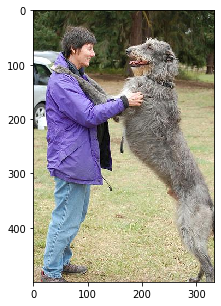

In [5]:
## set the seed for the np.random module, so we always get the same image when run this code cell
np.random.seed(11)

# since we just want one image, I'll ramdomly choose a breed and a dog from that breed
breed = np.random.choice(breed_list)
dog = np.random.choice(os.listdir(ANNOTATION_DIR + breed))

# opening one image
img = cv2.imread(IMAGES_DIR + breed + '/' + dog + '.jpg') 
# this line is necessary because cv2 reads an image in BGR format (Blue, Green, Red) by default. 
# So we will convert it to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (5,5))
plt.imshow(img_RGB)

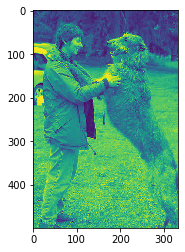

In [6]:
plt.imshow(img_grayscale)

image above shows that we have humans together with dogs

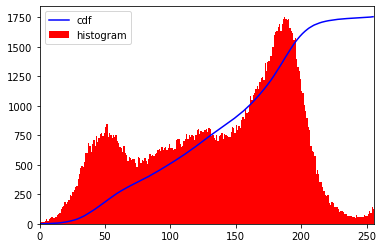

In [7]:
hist,bins = np.histogram(img_grayscale.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_grayscale.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

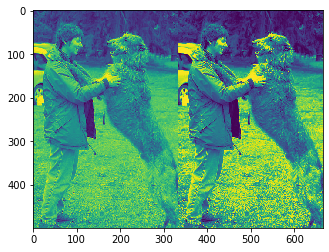

In [8]:
equ = cv2.equalizeHist(img_grayscale)
res = np.hstack((img_grayscale,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res)

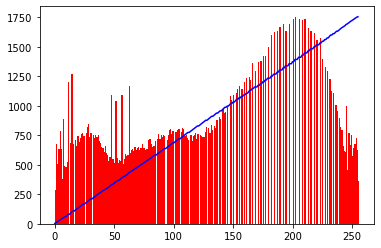

In [9]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.show()

## 1.3 Example mirroring

Augmented by rotation:


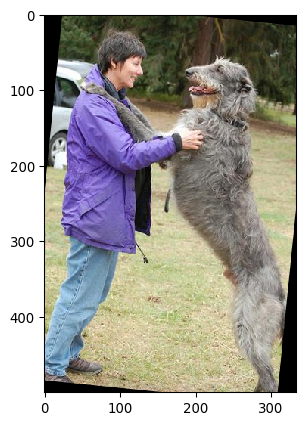

In [10]:
ia.seed(4)

rotate = iaa.Affine(rotate=(-60, 60))
image_aug_1 = rotate(image=img_RGB)
mirror = iaa.Fliplr(0.5)
image_aug_2 = mirror(image=img_RGB)
print("Augmented by rotation:")
ia.imshow(image_aug_1)

Augmented by mirroring:


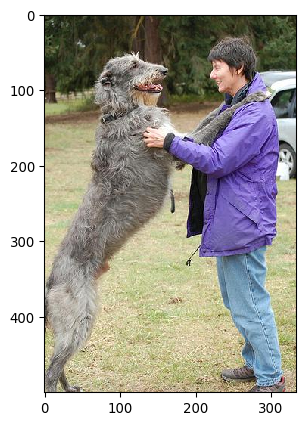

In [11]:
print("Augmented by mirroring:")
ia.imshow(image_aug_2)

## 1.4 Batch processing - equalization

In [12]:
PROCESSED_IMAGES_DIR = '/media/marco/DATA/OC_Machine_learning/section_6/DATA/processed_images/'
def hist_equal(file_name):
    # Read image file
    img = cv2.imread(IMAGES_DIR + breed + '/' + file_name + '.jpg') 
    grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply histogram equalization
    equ = cv2.equalizeHist(grayimg)
    # Save file to new directory
    cv2.imwrite(PROCESSED_IMAGES_DIR + equ + '.jpg')

    

In [20]:
f = [] # folders list
for dits,_,filenames in os.walk(IMAGES_DIR):
    f.append(dits)
print(len(f))


121


In [21]:
def load_data(label,data_dir,imgsize):
    for img in tqdm(os.listdir(data_dir)):
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(imgsize,imgsize))
        img = cv2.equalizeHist(img)
        X.append(np.array(img))
        y.append(str(label))

In [22]:
X = []
y = []
imgsize = 150
for a in f[1:121]:
    load_data(a.replace('-','_'),a,imgsize)

  8%|▊         | 12/157 [00:00<00:02, 56.44it/s] 


KeyboardInterrupt: 

In [ ]:
print(X.shape())